# Data Collections
## CS315 Final Project

Author: Parkhomchuk Malika

Table of content:
1. [Get tweet ids from the publicly available dataset](#part1)
2. [Prepare to save tweets into json files](#part2)
3. [Use tweepy for tweets collections](#part3)

### 1. Collecting tweet ids <a id="part1"></a>

For this part I have collected tweet ids from the paper: 
`Emily Chen and Emilio Ferrara. 2022. Tweets in Time of Conflict: A Public Dataset Tracking the Twitter Discourse on the War Between Ukraine and Russia. arXiv:cs.SI/2203.07488`

They have publicly shared the dataset of tweets collected on these queries:  
`ukraine                 2/22/22 
russia                  2/22/22 
putin                   2/22/22 
soviet                  2/22/22 
kremlin                 2/22/22 
minsk                   2/22/22 
ukrainian               2/22/22 
NATO                    2/22/22 
luhansk                 2/22/22 
donetsk                 2/22/22 
kyiv                    2/22/22 
kiev                    2/22/22 
moscow                  2/22/22 
zelensky                2/22/22 
fsb                     2/22/22 
KGB                     2/22/22  
Україна                 2/22/22 
Киев                    2/22/22 
ФСБ                     2/22/22 
Россия                  2/22/22 
КГБ                     2/22/22 
Київ                    3/1/22 
україни                 3/1/22 
Росія                   3/1/22 
кгб                     3/1/22 
фсб                     3/1/22 
SlavaUkraini            3/1/22 
ukrainian               3/1/22 
\U0001F1FA\U0001F1E6    3/1/22
Украина                 3/1/22 
украины                 3/1/22 
Donbas                  3/1/22 
donbas                  3/1/22 
Донбасс                 3/1/22 
Донбасс                 3/1/22 
своихнебросаем          3/9/22`

Their detaset consists of .txt files where each row is a separate Id, since Twitter does not allow sharing full information about tweets publically.
Since they have collected over 60 million tweet Ids, I have selected a fraction of days that I have retrieved tweets for. For now, I gathered tweet Ids from:  
 
 `'2022-02-28'
 '2022-03-01'
 '2022-03-02'
 '2022-03-03'
 '2022-03-04'
 '2022-03-05'
 '2022-03-06'`
  
However, even that resulted in 2 million tweets, so I selected a few files from each of those days. Below is the content of the folder where I saved the files from their dataset.

### 2. Preparing tweets for saving into json format <a id="part2"></a>

After gathering tweet Ids I still needed to retrieve full information about them from Twitter. I used tweepy for accessing Twitter API's endpoints.

In [2]:
import tweepy

In [3]:
my_bearer_token=###your#token

In [4]:
client = tweepy.Client(bearer_token=my_bearer_token)

I wrote a functions that saves tweet and user parameters ino separate dictionaries, and stores all of them in one dictionar, because it is easier to save them in json files that way.

In [5]:
def prepare_data(someTweets):
    """
    Takes a page of tweets as a parameter, and returns a dictionary of
    tweets and users parameters as lists of dictionaries
    """
    alldata = {'tweets': [], 'users': []}
    
    for tweet in someTweets.data:
        tweetDct = {fld: tweet[fld] for fld in tweet if fld != 'entities'}
        tweetDct['created_at'] = str(tweetDct['created_at']) # convert datatime object
        
        urls = []
        if 'entities' in tweet.keys() and tweet['entities']:
            if 'urls' in tweet['entities'].keys():
                urlsT = tweet['entities']['urls']
                for u in urlsT:
                    urls.append(u['display_url'])
        tweetDct['urls'] = urls
        
        tweetDct['isRetweet'] = False
        if tweet['text'].startswith('RT'):
            tweetDct['isRetweet'] = True
        
        alldata['tweets'].append(tweetDct)
        
    for user in someTweets.includes.get('users'):
        userDct = {key: user[key] for key in user}
        userDct['created_at'] = str(userDct['created_at'])
        alldata['users'].append(userDct)
    
    return alldata

### Collecting tweets using Twitter API <a id='part3'></a>

For this part I used `get_tweets` endpoint of `tweepy`, that takes a list of tweetIds and returns the corresponding tweets. In addiotion to the default information, like author_id and text, I retreived the date of tweet's creation, it's entities(for urls) and public metrics. For users I have retrieved their usernames, geolocation(if they shared it), date of account creation and if they are verified. After collecting 200,000 the function saves them into a json file.

In [6]:
import json
import time
import datetime
import os

In [16]:
def collectTweets(tweetIds, num, fileId):
    """
    Takes a list of tweet ids, index of a batch and index of a file as parameters,
    and creates json files of retrieved tweets
    """
    all_tweets = []
    l = len(tweetIds)
    counter = 1
    for i in range(0,l,100):
        try:
            batch = client.get_tweets(ids = tweetIds[i:i+100], expansions = 'author_id', 
                                      tweet_fields=['created_at',
                                                'entities',
                                                'public_metrics',
                                               ],
                                      user_fields=['username', 'location', 'created_at', 'verified'])
            data = prepare_data(batch)
            all_tweets.append(data)
            if len(all_tweets) > 200:
                with open(f"results_03_extended/batch_0{num}_0{fileId}_{counter}.json", 'w') as outf:
                    json.dump(all_tweets, outf, ensure_ascii=False)
                all_tweets = []
                counter += 1
        except:
            print(str(datetime.datetime.now()), 
                  "I hit the rate limit, going to sleep for 15 minutes.")
            time.sleep(15 * 60)


    with open(f"results_03_extended/batch_0{num}_0{fileId}_{counter}.json", 'w') as outf:
        json.dump(all_tweets, outf, ensure_ascii=False)

In [36]:
files = os.listdir('tweetIds_03_extended')
files.sort()
files

['ukraine_russia-2022-03-02-12.txt',
 'ukraine_russia-2022-03-03-03.txt',
 'ukraine_russia-2022-03-04-00.txt',
 'ukraine_russia-2022-03-07-13.txt',
 'ukraine_russia-2022-03-10-17.txt',
 'ukraine_russia-2022-03-11-21.txt',
 'ukraine_russia-2022-03-12-23.txt',
 'ukraine_russia-2022-03-13-07.txt',
 'ukraine_russia-2022-03-19-16.txt',
 'ukraine_russia-2022-03-20-08.txt',
 'ukraine_russia-2022-03-22-19.txt',
 'ukraine_russia-2022-03-23-14.txt',
 'ukraine_russia-2022-03-25-14.txt',
 'ukraine_russia-2022-03-26-23.txt']

Opened each text files and read in the tweet ids, and ran `collectTweets` defined above

In [28]:
for count, f in enumerate(files):
    with open(f"./tweetIds_03_extended/{f}") as inF:
        tweetIds = inF.readlines()
        tweetIds = [t.strip() for t in tweetIds]
        month = f.split('-')[2][1]
        print('month', month)
        print('fileId', count+7)
        print(len(tweetIds))
        collectTweets(tweetIds, month, count+7)

month 3
fileId 7
179888
2022-05-01 22:17:54.289573 I hit the rate limit, going to sleep for 15 minutes.
2022-05-01 22:36:02.586412 I hit the rate limit, going to sleep for 15 minutes.
2022-05-01 22:54:10.147747 I hit the rate limit, going to sleep for 15 minutes.
2022-05-01 23:12:16.685999 I hit the rate limit, going to sleep for 15 minutes.
2022-05-01 23:30:22.003770 I hit the rate limit, going to sleep for 15 minutes.
2022-05-01 23:48:26.291470 I hit the rate limit, going to sleep for 15 minutes.


After all of the tweets were successfully collected I counted their total amount. There were 2,028,368 tweets collected.

In [29]:
from collections import Counter

In [ ]:
path = 'results_03_extended'

allTweets = []
notRetweet = []

for f in os.listdir(f'{path}'):
    if f.startswith('batch'):
        inF = open(f'{path}/{f}','r')
        data = json.load(inF)
        inF.close()
        for batch in data:
            for tweet in batch['tweets']:
                allTweets.append(tweet['id'])
                if tweet['isRetweet'] == False:
                    notRetweet.append(tweet['id'])

In [32]:
len(set(allTweets))

2213227

In [34]:
len(set(notRetweet))

595887

### Collecting tweets with queries in Russian

These tweets were not used for the paper

In [22]:
queries = ['#президентмойдруг', '#zароссию', '#надонбассевойна8лет', '#zанаших', '#героиz', '#героиv', '#зароссию', 
          '#занаших', 'фашист', 'днр', 'лнр', 'освободители', 'освободить', 'био', 'биооружие', 'пентагон', 'биологическое',
          'зеленский', 'путин', 'нацист', 'спецоперация', 'киев', 'кгб', 'америка', 'сша', 'донбасс', 'буча', 'мариуполь',
          'украина']

In [23]:
query_string = ''
for q in range(len(queries)-1):
    query_string += queries[q] + ' OR '
    
query_string += queries[-1]
query_string

'#президентмойдруг OR #zароссию OR #надонбассевойна8лет OR #zанаших OR #героиz OR #героиv OR #зароссию OR #занаших OR фашист OR днр OR лнр OR освободители OR освободить OR био OR биооружие OR пентагон OR биологическое OR зеленский OR путин OR нацист OR спецоперация OR киев OR кгб OR америка OR сша OR донбасс OR буча OR мариуполь OR украина'

In [20]:
page1 = client.search_recent_tweets(query = query_string, max_results = 100,expansions = 'author_id', 
                                      tweet_fields=['created_at',
                                                'entities',
                                                'public_metrics'],
                                      user_fields=['username', 'location', 'created_at', 'verified'])

In [28]:
data = prepare_data(page1)
path = 'russian_queries_results_04'
with open(f"{path}/results_0.json", 'w') as outf:
    json.dump([data], outf, ensure_ascii=False)

In [ ]:
import time
import datetime

# Helper variables
prev_page = page1
counter = 1
allPages = []

while 'next_token' in prev_page.meta:
    nextToken = prev_page.meta['next_token']
    try: 
        page = client.search_recent_tweets( 
                                  query=query_string,
                                  tweet_fields=['created_at',
                                                'entities',
                                                'public_metrics',
                                               ], 
                                  expansions='author_id',
                                  user_fields=['username', 'description', 'name', 
                                               'location', 'created_at', 
                                               'public_metrics', 'verified'],
                                  next_token=nextToken,
                                  max_results=100)
        
        # Setup things for next iteration
        prev_page = page
        # Prepare data for storage
        data = prepare_data(page)
        allPages.append(data)
        # Save into a file every 1000 tweets
        if len(allPages) >= 450:
            with open(f"{path}/results_{counter}.json", 'w') as outf:
                json.dump(allPages, outf, ensure_ascii=False)
            allPages = []
            counter += 1
        
    except:
        print(str(datetime.datetime.now()),
                  "I hit the rate limit, going to sleep for 15 minutes.")
        time.sleep(15 * 60) # sleep for 15 minutes

# Store the remaining pages, because the rate limit was not hit, so we have unstored data        
if len(allPages) > 0:
    with open(f"{path}/results_{counter}.json", 'w') as outf:
        json.dump(allPages, outf, ensure_ascii=False)

In [31]:
files = os.listdir('russian_queries_results_04')

In [56]:
files

['results_0.json',
 'results_1.json',
 'results_6.json',
 'results_7.json',
 'results_4.json',
 'results_8.json',
 'results_9.json',
 'results_5.json',
 'results_10.json',
 'results_2.json',
 'results_3.json',
 'results_11.json']

In [34]:
from collections import Counter

In [33]:
dates = []
for f in files:
    inF = open(f'{path}/{f}','r')
    data = json.load(inF)
    inF.close()
    
    for batch in data:
        for tweet in batch['tweets']:
            date = tweet['created_at'].split()[0]
            dates.append(date)

print(set(dates))

{'2022-04-17', '2022-04-13', '2022-04-16', '2022-04-18', '2022-04-14', '2022-04-15'}


NameError: name 'Counter' is not defined

In [35]:
dates_c = Counter(dates).most_common(20)
dates_c

[('2022-04-16', 97161),
 ('2022-04-18', 96062),
 ('2022-04-14', 93128),
 ('2022-04-15', 86948),
 ('2022-04-17', 82900),
 ('2022-04-13', 34916)]

In [37]:
count = 0
for f in files:
    inF = open(f'{path}/{f}','r')
    data = json.load(inF)
    inF.close()
    
    for batch in data:
        for tweet in batch['tweets']:
            count+=1

print(count)

491115


In [38]:
import nltk
from nltk.tokenize import TweetTokenizer

In [58]:
corpus = []
tweet_tokenizer = TweetTokenizer()

for f in files:
    inF = open(f'{path}/{f}','r')
    data = json.load(inF)
    inF.close()
    for batch in data:
        for tweet in batch['tweets']:
            if tweet['isRetweet'] == False:
                text = tweet['text']
                tokens = tweet_tokenizer.tokenize(text)
                corpus += tokens

In [41]:
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/parhomcukmalika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
puncts = list(string.punctuation)

In [52]:
additional_ru = ['это', 'of', '...', 'пока', '«', '»', 'лет','весь', 'ваши', 'россии','the', 'украину', 'украине',
                'украины', 'россию', 'on', 'путина', 'просто', '🇺', '🇦', '#ukraine', 'ukraine',
                '#russia', 'putin', 'in', 'new', 'новой', 'state', 'china', 'скоро', 'law', 'несколько',
                'to', 'announcement', 'federal', 'rule', 'foundation', 'emergency', 'rescue', 
                 '新中国联邦和法治基金关于紧急救援乌克兰的通知', 'rt', '…', '—', '️','...' ]

In [59]:
def langsCleanCorp(corp):
    stopwords = nltk.corpus.stopwords.words('russian') + additional_ru
        
    corp = [w.lower() for w in corp]
    corp = [w for w in corp if w not in stopwords+puncts]
    corp = [w for w in corp if not w.startswith('https://')]
    
    return corp

In [60]:
c = langsCleanCorp(corpus)

In [61]:
Counter(c).most_common(25)

[('путин', 27125),
 ('сша', 25733),
 ('украина', 18084),
 ('зеленский', 8244),
 ('киев', 6689),
 ('рф', 6327),
 ('днр', 5845),
 ('#украина', 5408),
 ('россия', 4955),
 ('мариуполь', 4868),
 ('донбасс', 4118),
 ('био', 3164),
 ('против', 3144),
 ('@rianru', 3045),
 ('ещё', 2972),
 ('–', 2955),
 ('је', 2930),
 ('спецоперация', 2891),
 ('москва', 2860),
 ('войны', 2780),
 ('нато', 2776),
 ('всё', 2673),
 ('#россия', 2598),
 ('почему', 2551),
 ('войну', 2545)]

In [63]:
hashtags = []
tweet_tokenizer = TweetTokenizer()

for f in files:
    inF = open(f'{path}/{f}','r')
    data = json.load(inF)
    inF.close()
    for batch in data:
        for tweet in batch['tweets']:
            text = tweet['text']
            tokens = tweet_tokenizer.tokenize(text)
                
            for w in tokens:
                if w.startswith('#'):
                    hashtags.append(w)

In [156]:
unique_hashtags = set(hashtags)
unique_hashtags = [h.lower() for h in unique_hashtags]
unique_hashtags = set(unique_hashtags)
len(unique_hashtags)

lower_hash = [h.lower() for h in hashtags]

In [171]:
test = Counter(lower_hash).most_common()
u_hash = []

for h in test:
    if h[1] > 10:
        u_hash.append(h[0])

len(u_hash)

920

In [80]:
hash_c = Counter(hashtags).most_common(25)
popular_hash = [h[0] for h in hash_c]
hash_c

[('#Украина', 8136),
 ('#Россия', 3316),
 ('#Ukraine', 2757),
 ('#Мариуполь', 2253),
 ('#украина', 1428),
 ('#', 1220),
 ('#Путин', 1197),
 ('#Киев', 1197),
 ('#США', 1062),
 ('#Russia', 1036),
 ('#Новости', 1029),
 ('#UkraineWar', 1009),
 ('#ГероиZ', 976),
 ('#Буча', 973),
 ('#война', 943),
 ('#Україна', 935),
 ('#агрессияРоссии', 899),
 ('#россия', 879),
 ('#новости', 832),
 ('#Николаев', 774),
 ('#новини', 742),
 ('#UkraineRussiaWar', 732),
 ('#войнасукраиной', 687),
 ('#вторжениеРоссии', 653),
 ('#stoprussia', 604)]

In [168]:
tweet_hash = {}

for f in files:
    inF = open(f'{path}/{f}','r')
    data = json.load(inF)
    inF.close()
    for batch in data:
        for tweet in batch['tweets']:
            text = tweet['text']
            tokens = tweet_tokenizer.tokenize(text)
            tweetHash = []
            for w in tokens:
                if w.startswith('#'):
                    tweetHash.append(w.lower())
                            
        tweet_hash[tweet['id']] = tweetHash

In [73]:
import numpy as np

In [112]:
#popular_hash.remove('#')
matrix = {}

for h in popular_hash:
    matrix[h] = list(np.zeros(len(popular_hash), dtype=int))

In [113]:
for h1 in popular_hash:
    for key in tweet_hash:
        hashs = tweet_hash[key]
        if h1 in hashs:
            for i in range(len(popular_hash)):
                h2 = popular_hash[i]
                if h1 == h2:
                    matrix[h1][i] = 0
                elif h2 in hashs:
                    matrix[h1][i] += 1

In [83]:
import networkx as nx
G = nx.Graph()

for h in popular_hash: 
    G.add_nodes_from([(h)])
    
for h in matrix:
    edges = matrix[h]
    for i in range(len(edges)):
        if edges[i] != 0:
            G.add_weighted_edges_from([(h,popular_hash[i],edges[i])])

In [84]:
import matplotlib.pyplot as plt

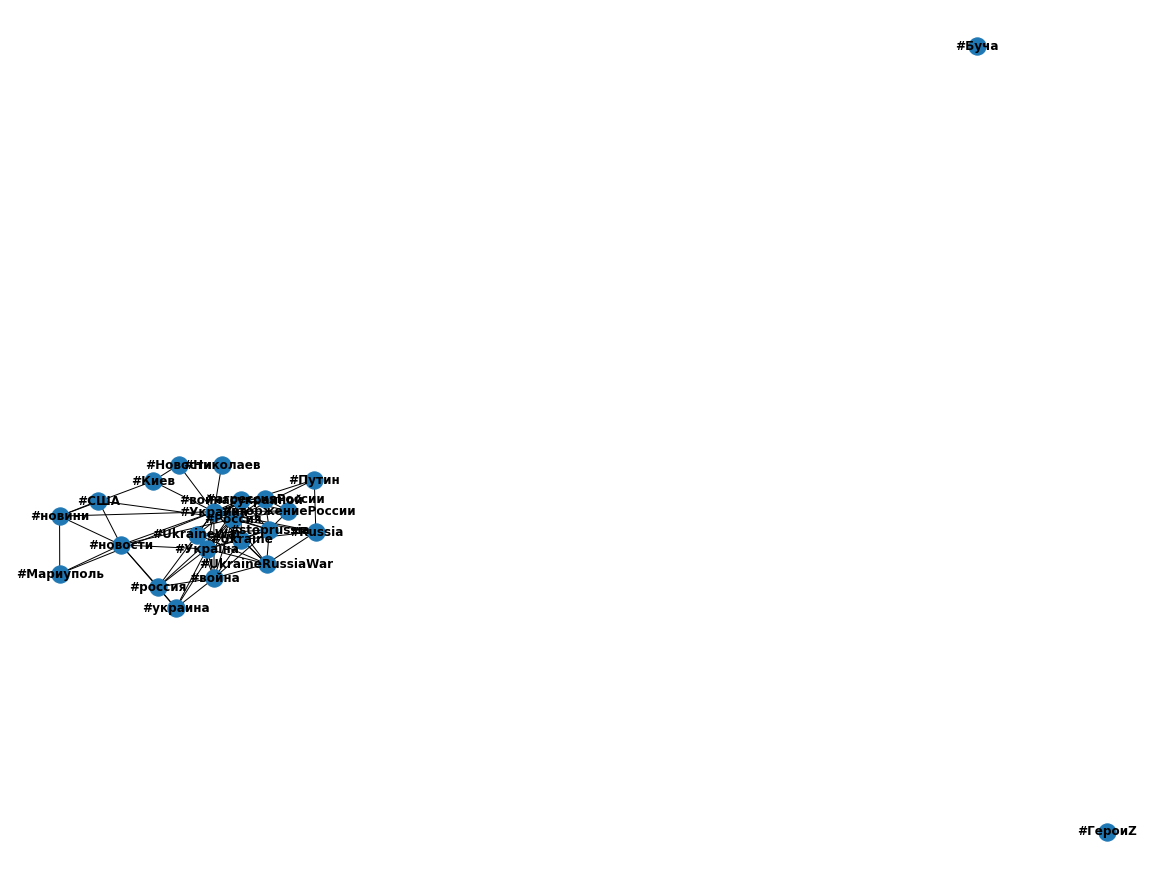

In [85]:
plt.figure(figsize=(16,12))# change size of matlab drawing area

options = {'with_labels': True,
          'font_color': 'black', 'font_weight': 'bold'}

edges = G.edges()

d = dict(G.degree)
#colors = [len(G[u][v]['courses']) for u,v in edges]
#weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_spring(G, **options)

In [172]:
matrix = {}

for h in u_hash:
    matrix[h] = list(np.zeros(len(u_hash), dtype=int))

for h1 in u_hash:
    for key in tweet_hash:
        hashs = tweet_hash[key]
        if h1 in hashs:
            for i in range(len(u_hash)):
                h2 = u_hash[i]
                if h1 == h2:
                    matrix[h1][i] = 0
                elif h2 in hashs:
                    matrix[h1][i] += 1

In [174]:
### for filtering
for h in matrix:
    if sum(matrix[h]) == 0:
        u_hash.remove(h)
        
matrix = {}
        
for h in u_hash:
    matrix[h] = list(np.zeros(len(u_hash), dtype=int))

for h1 in u_hash:
    for key in tweet_hash:
        hashs = tweet_hash[key]
        if h1 in hashs:
            for i in range(len(u_hash)):
                h2 = u_hash[i]
                if h1 == h2:
                    matrix[h1][i] = 0
                elif h2 in hashs:
                    matrix[h1][i] += 1

In [175]:
len(matrix)

258

In [177]:
G = nx.Graph()

for h in u_hash: 
    G.add_nodes_from([(h)])
    
for h in matrix:
    edges = matrix[h]
    for i in range(len(edges)):
        if edges[i] != 0:
            G.add_weighted_edges_from([(h,u_hash[i],edges[i])])

In [178]:
plt.figure(figsize=(16,12))# change size of matlab drawing area

options = {'with_labels': True,
          'font_color': 'black', 'font_weight': 'bold'}

#edges = G.edges()

#d = dict(G.degree)
#colors = [len(G[u][v]['courses']) for u,v in edges]
#weights = [G[u][v]['weight'] for u,v in edges]

#nx.draw_spring(G, **options)

<Figure size 1152x864 with 0 Axes>

In [147]:
import plotly.graph_objects as go

In [179]:
pos = nx.spring_layout(G, k=0.5, iterations=50)

In [180]:
for n, p in pos.items():
    G._node[n]['pos'] = p
    
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G._node[edge[0]]['pos']
    x1, y1 = G._node[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G.nodes():
    x, y = G._node[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [181]:
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

In [182]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br> Hashtags Network',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="",
                    showarrow=False,
                    xref="paper", yref="paper") ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()